In [1]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [2]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

__Подготовка данных__

Посмотрим, есть ли пропуски в датасете

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Пропусков нет, посмотрим тогда на качество данных

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


CRIM
Выбросы определенно есть, т.к. максимальное значение намного выше среднего или сигмы > 75%
Требуется проверка

ZN
Так же, очень похоже, что есть выброс, т.к. значение сильно отклоняется от среднего и каждой из сигм. 
Требуется проверка

INDUS
Все среднестатистические показатели в норме
Проверка не требуется

CHAS
Все среднестатистические показатели в норме
Проверка не требуется

NOX
Все среднестатистические показатели в норме
Проверка не требуется

RM
Все среднестатистические показатели в норме
Проверка не требуется

AGE
Миниальное значение выглядит слишком малым.
Требуется проверка

DIS
Максимальное значение намного выше, чем среднестатистическое и сигма >75%
Требуется проверка

RAD
Все среднестатистические показатели в норме
Проверка не требуется

TAX
Все среднестатистические показатели в норме. Но можно проверить
Требуется проверка

PTRATIO
Все среднестатистические показатели в норме
Проверка не требуется

B
Минимальное значение не выглядит естесственно
Требуется проверка

LSTAT
Максимальное значение выглядит весьма выше, чем сигма >75%
Требуется проверка

MEDV
Все среднестатистические показатели в норме. На всякий случай посмотрим на гистограмму
Проверка не требуется

Посмотрим на гистограмму целевого столбца

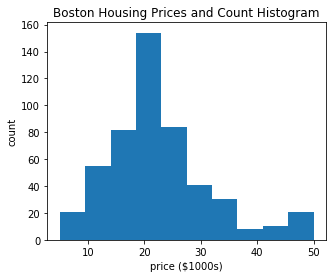

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.hist(data.MEDV)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

Вроде никак отклонений не видно, гистограмма почти по нормальному закону распределена

__Проверка сомнительных столбцов__

CRIM

In [4]:
print(data[data['CRIM'] > 9].shape) #выше стандартного отклонения
data[data['CRIM'] > 9].head()

(66, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0


Везде, где уровень преступности CRIM > 9, TAX =666, RAD =24. Наврядли это ошибка.
Посмотрим на данные, в которые CRIM больше 50%

In [5]:
print(data[data['CRIM'] > 50].shape)
data[data['CRIM'] > 50].head()

(4, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


Я думаю, что можно исключать записи с уровнем приступности выше 50%, т.к. это может сильно повлиять на модель

In [6]:
data = data[data['CRIM'] < 50]
data.shape

(502, 14)

ZN

In [7]:
print(data[data['ZN'] == 0].shape) #проверим, где нулевые значения и сколько их
data[data['ZN'] == 0].head()

(368, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Нулевых значений больше половины, это не может быть ошибкой. Оставим все значений

DIS

In [8]:
print(data[data['DIS'] > 4].shape) #выше среднего
data[data['DIS'] > 4].head()

(190, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Показатели выглядят реалистичными. 

TAX

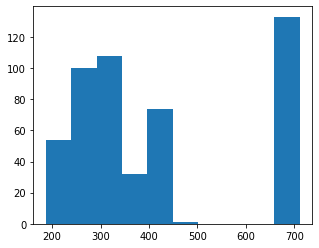

In [9]:
plt.figure(figsize=(5, 4))
plt.hist(data.TAX)
plt.show()

In [10]:
data.TAX.value_counts()

666    128
307     40
403     30
437     15
304     14
      ... 
280      1
313      1
351      1
422      1
285      1
Name: TAX, Length: 66, dtype: int64

In [11]:
print(data[data['TAX'] > 666].shape)
data[data['TAX'] > 666].head()

(5, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1


Вроде значения реалистичны

AGE

In [12]:
print(data[data['AGE'] < 68].shape) #меньше среднего значения
data[data['AGE'] < 68].head()

(211, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Попробую значения ближе к минимальному

In [13]:
print(data[data['AGE'] < 8].shape) #близкое к минимальному
data[data['AGE'] < 8]

(9, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72,24.2
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,23.4
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
252,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6


Я думаю, что можно удалить 1 строку, где AGE =2.9, так как считаю, что это выброс

In [14]:
data = data[data['AGE'] > 3]
data.shape

(501, 14)

B

Если честно, то вообще непонятен столбец B. Попробую вытащить Bk

In [15]:
def convert_d(data):
    converted = (data**(0.5))/1000 + 0.63
    return(converted)

data['B'] = data['B'].map(convert_d)

In [16]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,0.649922,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,0.649922,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,0.649820,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,0.649865,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,0.649922,5.33,36.2


Посмотрим, что изменилось с точки зрения статистики со столбцом B

In [17]:
data.B.describe()

count    501.000000
mean       0.648596
std        0.003475
min        0.630566
25%        0.649378
50%        0.649786
75%        0.649906
max        0.649922
Name: B, dtype: float64

Как видно, значения не сильно отличаются друг от друга. 

LSTAT

In [18]:
print(data[data['LSTAT'] > 30].shape) #близкое к максимальному
data[data['LSTAT'] > 30].head()

(12, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,0.649922,30.81,14.4
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,0.649922,34.41,14.4
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,0.649922,34.77,13.8
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,0.649922,37.97,13.8
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,0.646907,30.63,8.8


Значения выглядят реалистичными

Поскольку ни пропусков, ни каких-то выбросов в датасете больше не наблюдается, то попробуем сначала построить линейную модель, используя все столбцы

# Модели регресии

__Линейная регрессия__

In [19]:
from sklearn.model_selection import train_test_split

Сначала разделим данные на обучающие и тренировочные

In [20]:
X = data.drop(['MEDV'], axis=1)
Y = data.MEDV
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [21]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, HuberRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

Строим модель линейной регрессии

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = model.predict(x_test)

Считаем, насколько качественно модель предсказывает MEDV

In [24]:
import numpy as np

In [26]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test)) 

MAE 3.4456591669085768
MSE 22.353057814973997
RMSE 4.727902052176419
Score: 0.710570976207459


вероятность предсказания правильной цены составляет 71,1%.

попробуем то же самое, но со StandardScaler

In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test)) 

MAE 3.4456591669085648
MSE 22.353057814973752
RMSE 4.727902052176393
Score: 0.7105709762074621


Особых улучшений нет

__Лассо регрессия__

In [31]:
lasso_reg = Lasso()
# Для лассо только один параметр можно подобрать - альфа
lasso_params = {
    'alpha': np.logspace(-7, 2, 1000)
}
grid_lasso = GridSearchCV(lasso_reg, lasso_params, cv=10, verbose=2, n_jobs=-1)
grid_lasso.fit(x_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6028 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:    8.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.02096066e-07, 1.04236067e-07, 1.06420924e-07,
       1.08651577e-07, 1...
       6.74262224e+01, 6.88395207e+01, 7.02824426e+01, 7.17556092e+01,
       7.32596543e+01, 7.47952252e+01, 7.63629826e+01, 7.79636013e+01,
       7.95977700e+01, 8.12661920e+01, 8.29695852e+01, 8.47086827e+01,
       8.64842328e+01, 8.82969996e+01, 9.01477631e+01, 9.20373200e+01,
       9.39664831e+01, 9.59360829e+01, 9.79469667e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [32]:
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)
print(grid_lasso.best_estimator_)

{'alpha': 0.051488674501374974}
0.7088356824353984
Lasso(alpha=0.051488674501374974, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


Качество хуже, чем у линейной регрессии - 70,88%

__Ридж-регрессия__

In [33]:
rige_reg = Ridge()

# Для ридж-регрессии можно еще перебрать оптимизаторы
rige_params = {
    'alpha': np.logspace(-7, 2, 1000),
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_rige = GridSearchCV(rige_reg, rige_params, cv=10, verbose=2, n_jobs=-1)
grid_rige.fit(x_train, y_train)

Fitting 10 folds for each of 6000 candidates, totalling 60000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 6532 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 19524 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 37636 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 59880 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 60000 out of 60000 | elapsed:   45.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.02096066e-07, 1.04236067e-07, 1.06420924e-07,
       1.08651577e-07, 1.10928986e-07, 1.13254132e-07, 1.15628013e-07,
       1.18051653e...
       7.32596543e+01, 7.47952252e+01, 7.63629826e+01, 7.79636013e+01,
       7.95977700e+01, 8.12661920e+01, 8.29695852e+01, 8.47086827e+01,
       8.64842328e+01, 8.82969996e+01, 9.01477631e+01, 9.20373200e+01,
       9.39664831e+01, 9.59360829e+01, 9.79469667e+01, 1.00000000e+02]),
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=No

In [34]:
print(grid_rige.best_params_)
print(grid_rige.best_score_)
print(grid_rige.best_estimator_)

{'alpha': 18.6324631193156, 'solver': 'sag'}
0.7110197401013472
Ridge(alpha=18.6324631193156, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.001)


Качество лучше, чем у линейной регрессии - 71,11%

__Регрессия Хьюберта__

In [36]:
huber_reg = HuberRegressor()

# Регрессия не шибко быстрая, поэтому сделаем параметров поменьше
huber_params = {
    'alpha': np.logspace(-7, 2, 100),
    'epsilon': np.linspace(1.35, 2, 50)
}
grid_huber = GridSearchCV(huber_reg, huber_params, cv=10, verbose=2, n_jobs=-1)
grid_huber.fit(x_train, y_train)

Fitting 10 folds for each of 5000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 10392 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 19448 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 31128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 45368 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=HuberRegressor(alpha=0.0001, epsilon=1.35,
                                      fit_intercept=True, max_iter=100,
                                      tol=1e-05, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.23284674e-07, 1.51991108e-07, 1.87381742e-07,
       2.31012970e-07, 2.84803587e-07, 3.51119173e-07, 4.32876128e-07,
       5.33669923e-07, 6.57933225e-07,...
       1.68163265, 1.69489796, 1.70816327, 1.72142857, 1.73469388,
       1.74795918, 1.76122449, 1.7744898 , 1.7877551 , 1.80102041,
       1.81428571, 1.82755102, 1.84081633, 1.85408163, 1.86734694,
       1.88061224, 1.89387755, 1.90714286, 1.92040816, 1.93367347,
       1.94693878, 1.96020408, 1.97346939, 1.98673469, 2.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [37]:
print(grid_huber.best_params_)
print(grid_huber.best_score_)
print(grid_huber.best_estimator_)

{'alpha': 0.5336699231206312, 'epsilon': 2.0}
0.7059924618240446
HuberRegressor(alpha=0.5336699231206312, epsilon=2.0, fit_intercept=True,
               max_iter=100, tol=1e-05, warm_start=False)


Качество хуже, чем у ридж-регрессии - 70,59%

__ElasticNet регрессия__

In [38]:
elast_reg = ElasticNet()

elast_params = {
    'alpha': np.logspace(-7, 2, 200),
    'l1_ratio': np.linspace(0, 1, 50)
}
grid_elast = GridSearchCV(elast_reg, elast_params, cv=10, verbose=2, n_jobs=-1)
grid_elast.fit(x_train, y_train)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 7288 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 20280 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 38392 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 61752 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 90232 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.10975250e-07, 1.23155060e-07, 1.36671636e-0...
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [39]:
print(grid_elast.best_params_)
print(grid_elast.best_score_)
print(grid_elast.best_estimator_)

{'alpha': 0.06150985788580504, 'l1_ratio': 0.1020408163265306}
0.7110060827183822
ElasticNet(alpha=0.06150985788580504, copy_X=True, fit_intercept=True,
           l1_ratio=0.1020408163265306, max_iter=1000, normalize=False,
           positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)


Качество немного хуже, чем у ридж-регрессии - 71,11%

__Дерево решений__

In [40]:
tree_reg = DecisionTreeRegressor()

tree_params = {
    'max_depth': range(1, 11),
    'splitter': ['best', 'random'],
    'criterion': ['mse', 'mae', 'friedman_mse'],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
grid_tree = GridSearchCV(tree_reg, tree_params, cv=10, verbose=2, n_jobs=-1)
grid_tree.fit(x_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    3.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': range(1, 11),
                         'min_samp

In [41]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 1, 'splitter': 'best'}
0.8262688172803246
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


Пока что Дерево решений показывает наилучший результат - 82,6%

__Случайные лес__

In [45]:
rf = RandomForestRegressor()
rf_params = {
    'max_depth': range(1, 11),
    'criterion': ['mse', 'mae'],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
grid_rf = GridSearchCV(rf, rf_params, cv=10, verbose=2, n_jobs=-1)
grid_rf.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 697 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 980 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [46]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 1}
0.8864032825749353
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


Лучшее качество показал случайный лес - 88,6%

__Итоги на тестовых данных__

In [49]:
estimators = {
    'lasso': grid_lasso,
    'rige': grid_rige,
    'huber': grid_huber,
    'elasticNet': grid_elast,
    'decision_tree': grid_tree,
    'random_forest': grid_rf
}

In [50]:
for k in estimators:
    v = estimators[k]
    print(k, "CV R^2:", v.best_score_, "Validation R^2:", v.best_estimator_.score(x_test, y_test))

lasso CV R^2: 0.7088356824353984 Validation R^2: 0.7145413992514335
rige CV R^2: 0.7110197401013472 Validation R^2: 0.7220749175756476
huber CV R^2: 0.7059924618240446 Validation R^2: 0.735325947928606
elasticNet CV R^2: 0.7110060827183822 Validation R^2: 0.7223217662448967
decision_tree CV R^2: 0.8262688172803246 Validation R^2: 0.8004161902794813
random_forest CV R^2: 0.8864032825749353 Validation R^2: 0.8474169298588168


В линейной регресси нет параметров, которыми бы оказали значительный эффект. Во всех остальных я провела оптимизацию. Лучшие результаты получилось у Случайного леса - 88,6%